In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})

import seaborn as sns
sns.set(style='whitegrid', font_scale=0.9, rc={"lines.linewidth": 1.4,
                                           'lines.markersize': 1.6}, font="serif")

# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='notebook', fscale=1, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size

/Users/dylancromer/.venvs/maszcal/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [3]:
import numpy as np
import maszcal.lensing
from maszcal.data.sims import NBatta2010

In [4]:
ls ../data/NBatta2010/single-mass-bin-fits/

bary-free-c_2020-03-07-231720.header.txt
bary-free-c_2020-03-07-231720.npy
bary-free-c_2020-03-08-133606.header.txt
bary-free-c_2020-03-08-133606.npy
bary-free-c_2020-03-09-121008.header.txt
bary-free-c_2020-03-09-121008.npy
nfw-free-c_2020-03-07-213101.header.txt
nfw-free-c_2020-03-07-213101.npy
nfw-free-c_2020-03-08-115956.header.txt
nfw-free-c_2020-03-08-115956.npy
nfw-free-c_2020-03-09-113346.header.txt
nfw-free-c_2020-03-09-113346.npy


In [5]:
cat ../data/NBatta2010/single-mass-bin-fits/bary-free-c_2020-03-07-231720.header.txt

# NFW_PARAM_MINS = [28.7296334  0.       ]
# NFW_PARAM_MAXES = [36.61821794  6.        ]
# BARYON_PARAM_MINS = [2.87296334e+01 0.00000000e+00 1.00000000e-02 1.00000000e+00]
# BARYON_PARAM_MAXES = [36.61821794  6.          3.          7.        ]
# LOWER_RADIUS_CUT = 0.125
# UPPER_RADIUS_CUT = 3
# 


In [6]:
DATA_DIR = '../data/NBatta2010/single-mass-bin-fits/'
nfw_best_fits = np.load(DATA_DIR + 'nfw-free-c_2020-03-09-113346.npy')
bary_best_fits = np.load(DATA_DIR + 'bary-free-c_2020-03-09-121008.npy')

In [7]:
assert np.all(nfw_best_fits > 0)
assert np.all(bary_best_fits > 0)

In [8]:
nbatta_sims = NBatta2010('../data/NBatta2010/').cut_radii(0.125, 3)

In [9]:
zs = nbatta_sims.redshifts

In [10]:
nfw_mus = nfw_best_fits[0, :, :]
nfw_cs = nfw_best_fits[1, :, :]

nfw_masses = np.exp(nfw_mus)

bary_mus = bary_best_fits[0, :, :]
bary_cs = bary_best_fits[1, :, :]
bary_alphas = bary_best_fits[2, :, :]
bary_betas = bary_best_fits[3, :, :]

bary_masses = np.exp(bary_mus)

In [11]:
num_clusters = nfw_best_fits.shape[1]
noise_reduction_factor = 1/np.sqrt(num_clusters)

In [12]:
true_masses = nbatta_sims.masses.T

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


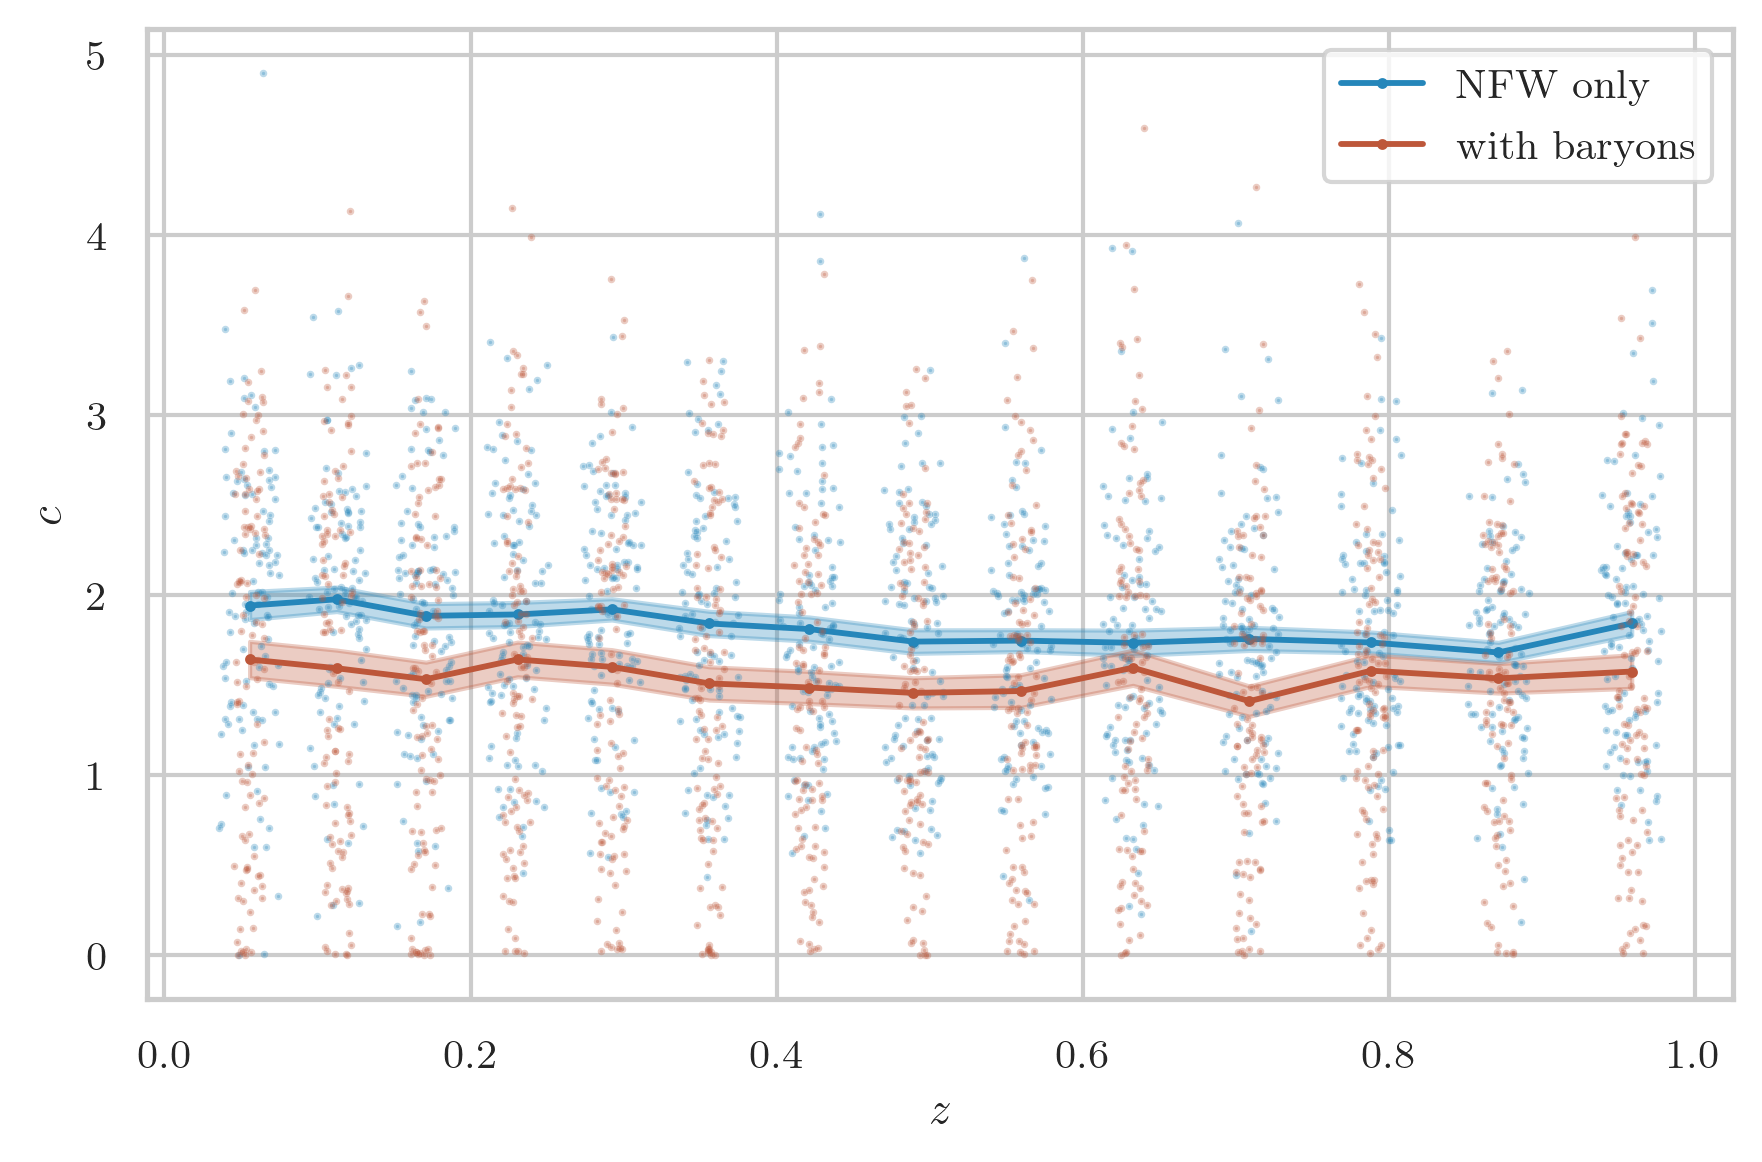

In [13]:
nfw_cs_mean = nfw_cs.mean(axis=0)
nfw_cs_std = nfw_cs.std(axis=0) * noise_reduction_factor
bary_cs_mean = bary_cs.mean(axis=0)
bary_cs_std = bary_cs.std(axis=0) * noise_reduction_factor

z_scatter = 0.04 * (np.random.rand(100, 14) - 1/2)
z_scatter_ = 0.02 * (np.random.rand(100, 14) - 1/2)

plt.plot(zs + z_scatter, nfw_cs, marker='.', linestyle='', color='#2586ba', alpha=0.3)
plt.plot(zs, nfw_cs_mean, color='#2586ba', marker='o', label='NFW only')
plt.fill_between(zs, nfw_cs_mean - nfw_cs_std, nfw_cs_mean + nfw_cs_std, color='#2586ba', alpha=0.3)

plt.plot(zs + z_scatter_, bary_cs, marker='.', linestyle='', color='#bd573a', alpha=0.3)
plt.plot(zs, bary_cs_mean, color='#bd573a', marker='o', label='with baryons')
plt.fill_between(zs, bary_cs_mean - bary_cs_std, bary_cs_mean + bary_cs_std, color='#bd573a', alpha=0.3)

plt.legend(loc='best')
plt.xlabel(r'$z$')
plt.ylabel(r'$c$')
pass

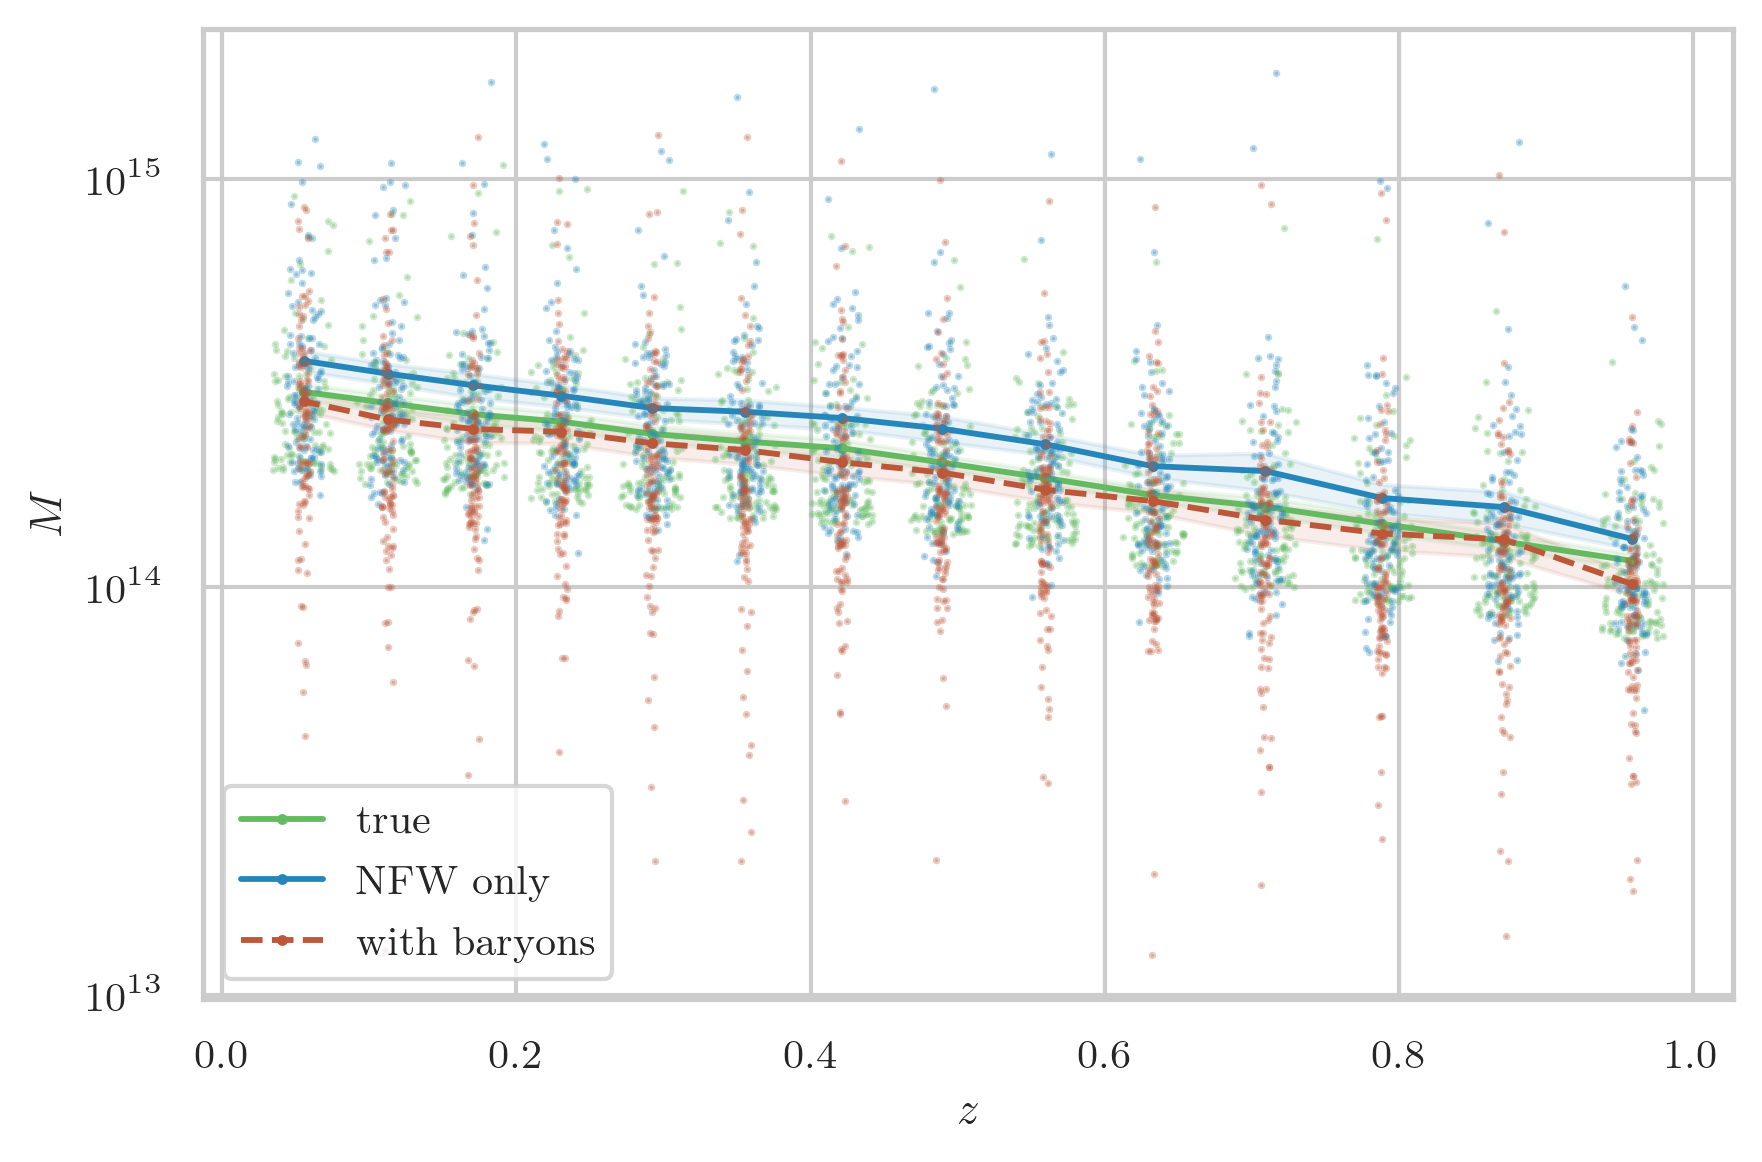

In [14]:
nfw_masses_mean = nfw_masses.mean(axis=0)
nfw_masses_std = nfw_masses.std(axis=0) * noise_reduction_factor
bary_masses_mean = bary_masses.mean(axis=0)
bary_masses_std = bary_masses.std(axis=0) * noise_reduction_factor
true_masses_mean = true_masses.mean(axis=0)
true_masses_std = true_masses.std(axis=0) * noise_reduction_factor

z_scatter_t = 0.042 * (np.random.rand(100, 14) - 1/2)
z_scatter_n = 0.024 * (np.random.rand(100, 14) - 1/2)
z_scatter_b = 0.008 * (np.random.rand(100, 14) - 1/2)

nfw_color = '#2586ba'
bary_color = '#bd573a'
true_color = '#64ba61'


plt.plot(zs + z_scatter_t, true_masses, marker='.', linestyle='', color=true_color, alpha=0.3)
plt.plot(zs, true_masses_mean, color=true_color, marker='o', label='true')
plt.fill_between(zs,
                 true_masses_mean - true_masses_std,
                 true_masses_mean + true_masses_std,
                 color=true_color,
                 alpha=0.1)

plt.plot(zs + z_scatter_n, nfw_masses, marker='.', linestyle='', color=nfw_color, alpha=0.3)
plt.plot(zs, nfw_masses_mean, color=nfw_color, marker='o', label='NFW only')
plt.fill_between(zs,
                 nfw_masses_mean - nfw_masses_std,
                 nfw_masses_mean + nfw_masses_std,
                 color=nfw_color,
                 alpha=0.1)

plt.plot(zs + z_scatter_b, bary_masses, marker='.', linestyle='', color=bary_color, alpha=0.3)
plt.plot(zs, bary_masses_mean, color=bary_color, marker='o', label='with baryons', linestyle='--')
plt.fill_between(zs,
                 bary_masses_mean - bary_masses_std,
                 bary_masses_mean + bary_masses_std,
                 color=bary_color,
                 alpha=0.1)

plt.legend(loc='best')
plt.xlabel(r'$z$')
plt.ylabel(r'$M$')
plt.yscale('log')
pass

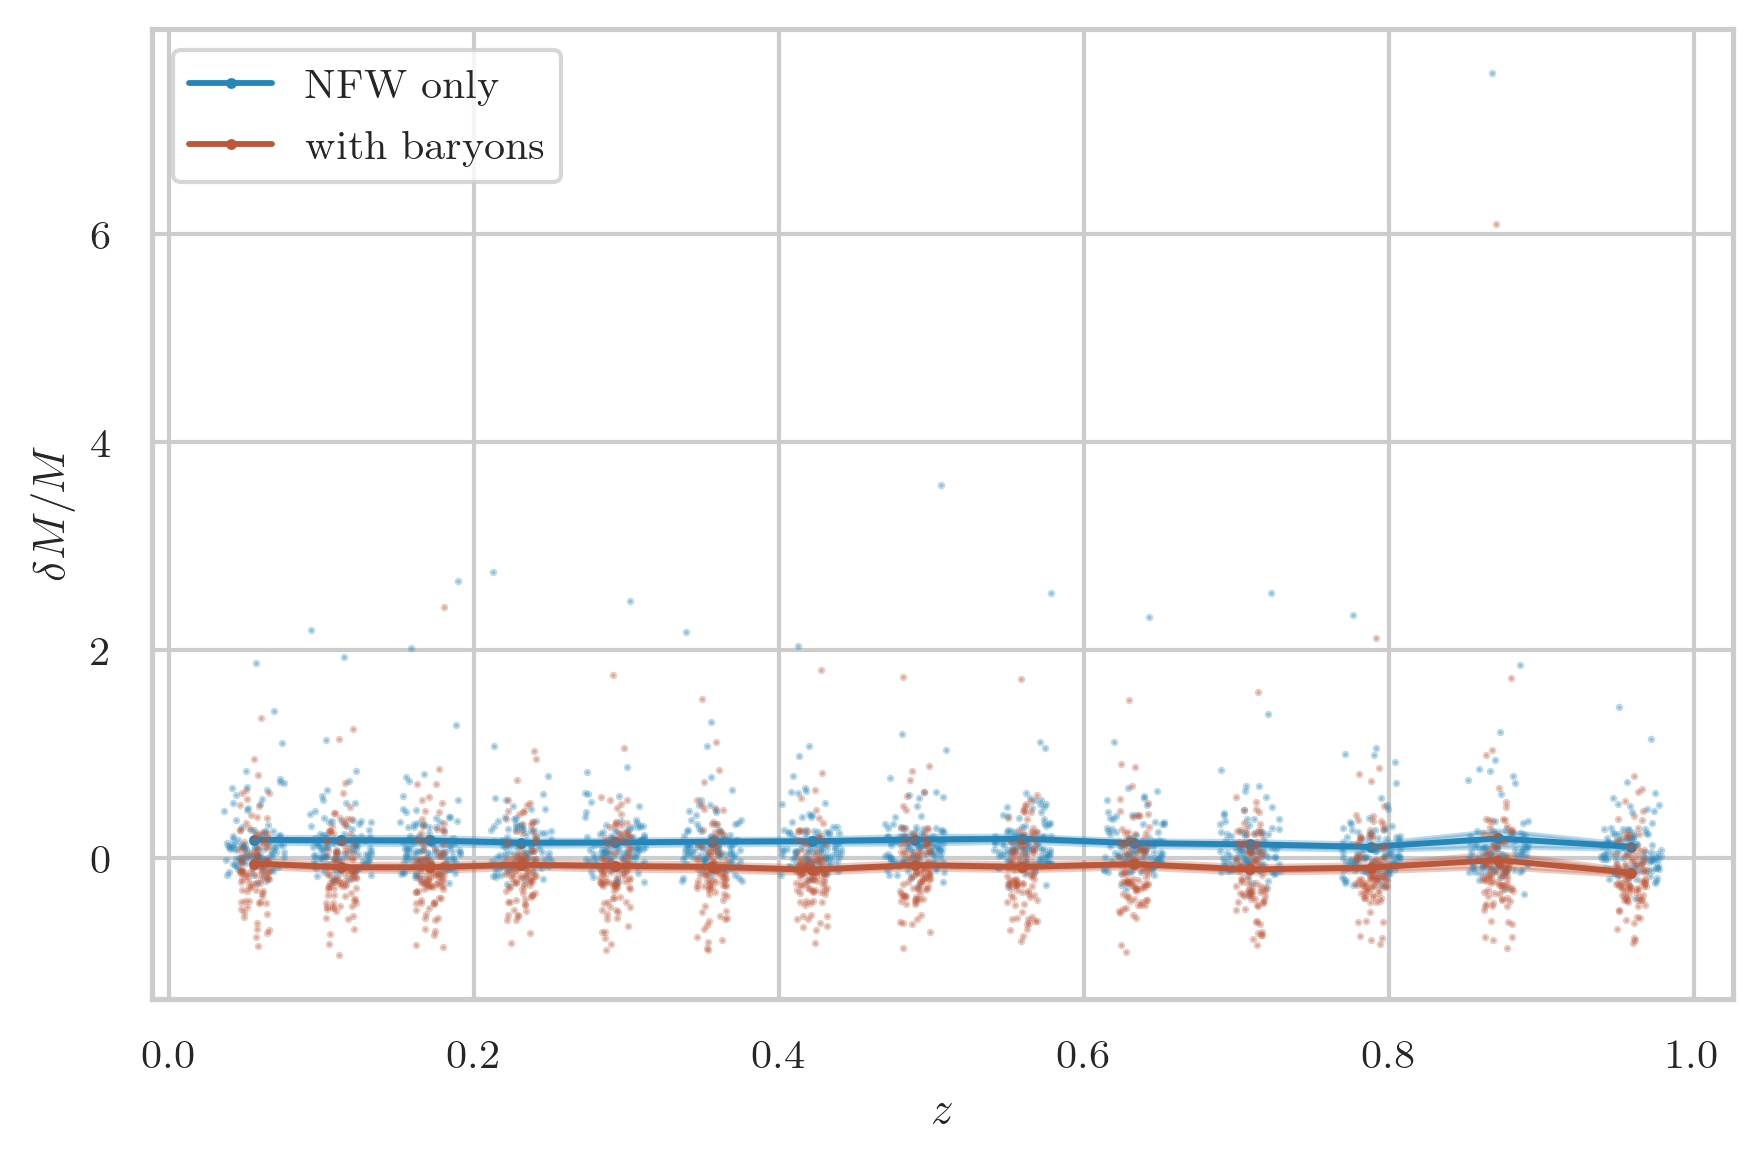

In [15]:
nfw_bias = (nfw_masses - true_masses)/true_masses
bary_bias = (bary_masses - true_masses)/true_masses
nfw_bias_mean = nfw_bias.mean(axis=0)
bary_bias_mean = bary_bias.mean(axis=0)
nfw_bias_std = nfw_bias.std(axis=0) * noise_reduction_factor
bary_bias_std = bary_bias.std(axis=0) * noise_reduction_factor

z_scatter = 0.04 * (np.random.rand(100, 14) - 1/2)
z_scatter_ = 0.02 * (np.random.rand(100, 14) - 1/2)

plt.plot(zs + z_scatter, nfw_bias, marker='.', linestyle='', color='#2586ba', alpha=0.3)
plt.plot(zs, nfw_bias_mean, color='#2586ba', marker='o', label='NFW only')
plt.fill_between(zs, nfw_bias_mean - nfw_bias_std, nfw_bias_mean + nfw_bias_std, color='#2586ba', alpha=0.3)

plt.plot(zs + z_scatter_, bary_bias, marker='.', linestyle='', color='#bd573a', alpha=0.3)
plt.plot(zs, bary_bias_mean, color='#bd573a', marker='o', label='with baryons')
plt.fill_between(zs, bary_bias_mean - bary_bias_std, bary_bias_mean + bary_bias_std, color='#bd573a', alpha=0.3)

plt.legend(loc='best')
plt.xlabel(r'$z$')
plt.ylabel(r'$\delta M/M$')
pass

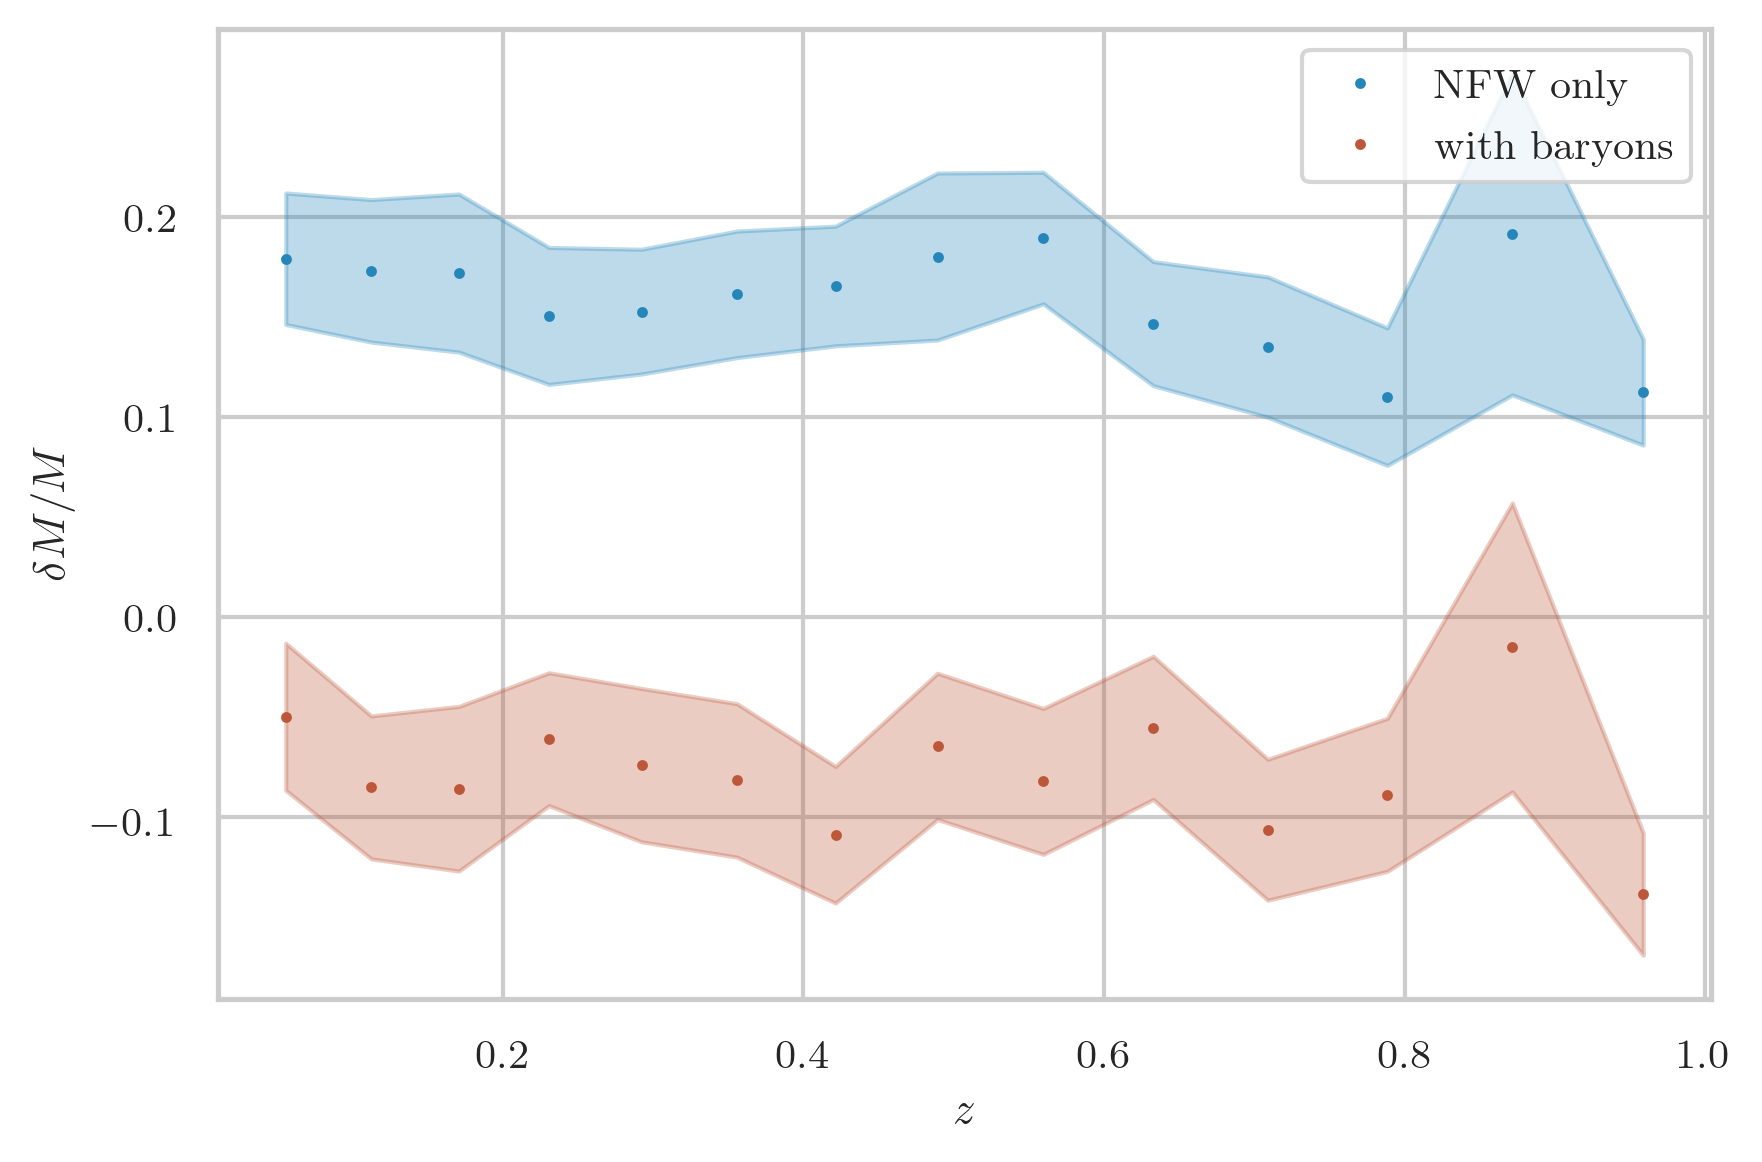

In [16]:
plt.plot(zs, nfw_bias_mean, color='#2586ba', marker='o', label='NFW only', linestyle='')
plt.fill_between(zs, nfw_bias_mean - nfw_bias_std, nfw_bias_mean + nfw_bias_std,
                 color='#2586ba', alpha=0.3)

plt.plot(zs, bary_bias_mean, color='#bd573a', marker='o', label='with baryons', linestyle='')
plt.fill_between(zs, bary_bias_mean - bary_bias_std, bary_bias_mean + bary_bias_std,
                 color='#bd573a', alpha=0.3)

plt.legend(loc='best')
plt.xlabel(r'$z$')
plt.ylabel(r'$\delta M/M$')

pass

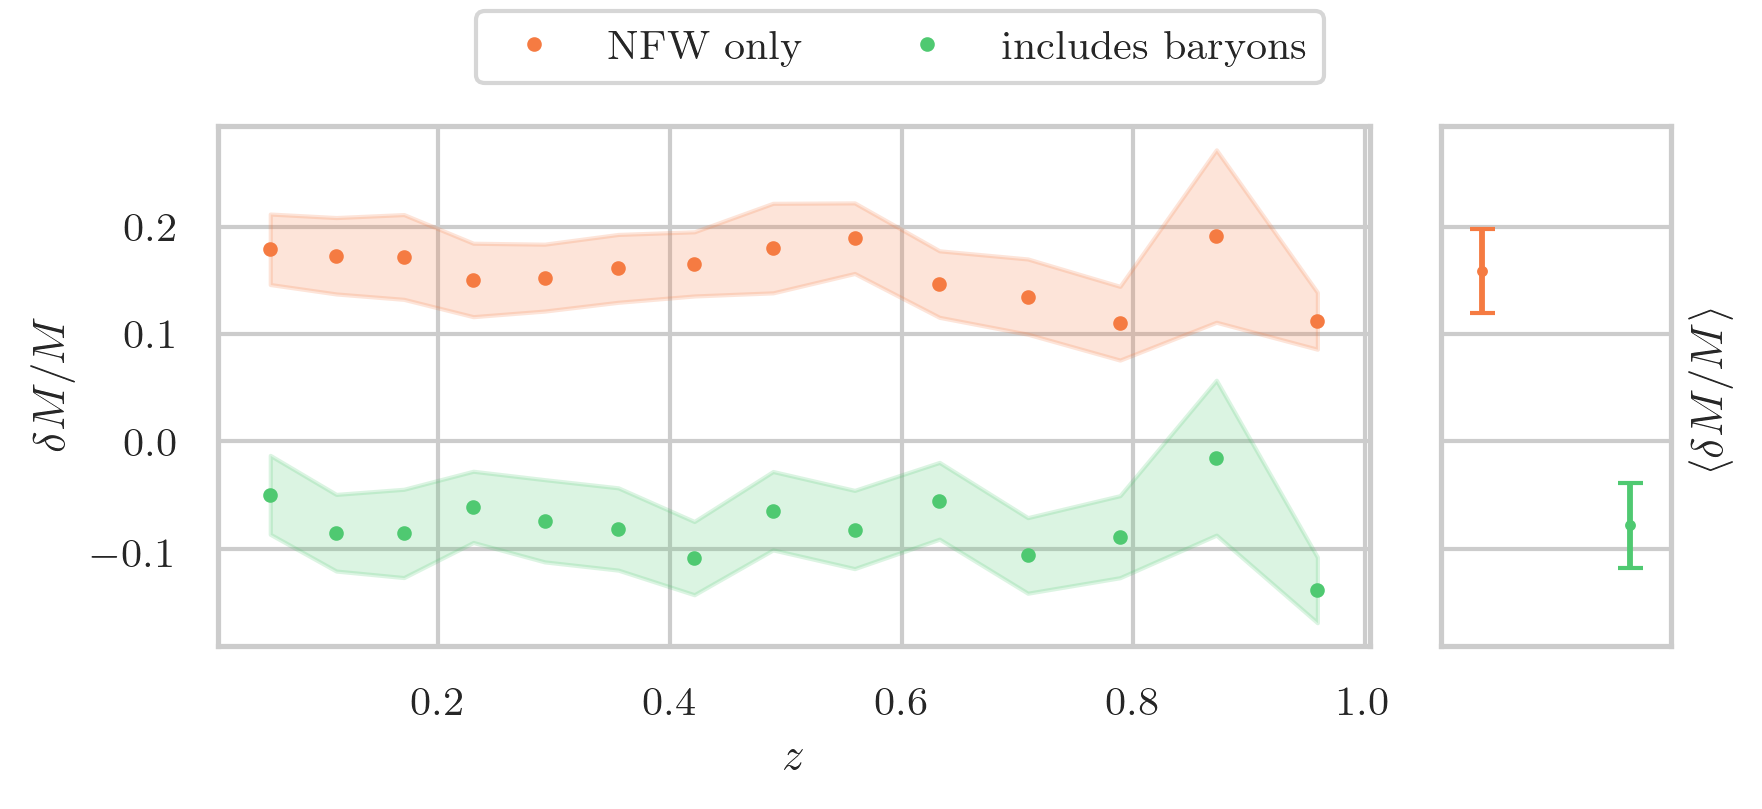

In [17]:
fig, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [5, 1]})

ax[0].plot(zs, nfw_bias_mean, marker='o', linestyle='', color='#f57b42', markersize=2.5,
        label=r'NFW only')
ax[0].fill_between(zs, nfw_bias_mean - nfw_bias_std, nfw_bias_mean + nfw_bias_std,
                 color='#f57b42', alpha=0.2)

ax[0].plot(zs, bary_bias_mean, marker='o', linestyle='', color='#4fc971', markersize=2.5,
        label=r'includes baryons')
ax[0].fill_between(zs, bary_bias_mean - bary_bias_std, bary_bias_mean + bary_bias_std,
                 color='#4fc971', alpha=0.2)

ax[0].set_ylabel(r'$\delta M/M$')
#ax[0].set_ylim((-0.28, 0.28))

ax[0].set_xlabel(r'$z$')


ax[1].errorbar(0 * np.ones(1), nfw_bias_mean.mean(), marker='o', linestyle='',
               yerr=np.std(nfw_bias) * noise_reduction_factor,
               color='#f57b42', capsize=3)

ax[1].errorbar(1 * np.ones(1), bary_bias_mean.mean(), marker='o', linestyle='',
               yerr=np.std(bary_bias) * noise_reduction_factor,
               color='#4fc971', capsize=3)

ax[1].set_ylabel(r'$\langle \delta M/M \rangle$')
ax[1].yaxis.set_label_position('right')
ax[1].set_xlim((-0.28, 1.28))
ax[1].set_xticks(())

fig.legend(loc='lower center', bbox_to_anchor=(0.5, 0.94), ncol=2)

fig.set_size_inches(6, 2.5)

plt.savefig('../figs/sims/NBatta2010/bias-of-redshift.pdf', bbox_inches='tight')

In [18]:
nfw_model = maszcal.lensing.SingleMassNfwLensingSignal(
        redshift=np.array([zs[5]]),
        delta=500,
        mass_definition='crit',
    )

baryon_model = maszcal.lensing.SingleBaryonLensingSignal(
    redshift=np.array([zs[5]]),
    delta=500,
    mass_definition='crit',
)

In [19]:
rs = nbatta_sims.radii

z_index = 5
cluster_index = 44

nfw_params = (nfw_best_fits[:, cluster_index, z_index])[None, :]
nfw_fit = nfw_model.esd(rs, nfw_params).flatten()

bary_params = np.concatenate((bary_best_fits[:, cluster_index, z_index], np.array([0.2])))[None, :]
bary_fit = baryon_model.esd(rs, bary_params).flatten()

true_wl = nbatta_sims.wl_signals[:, z_index, cluster_index]

In [20]:
nfw_params[0, 1]

2.161715706481812

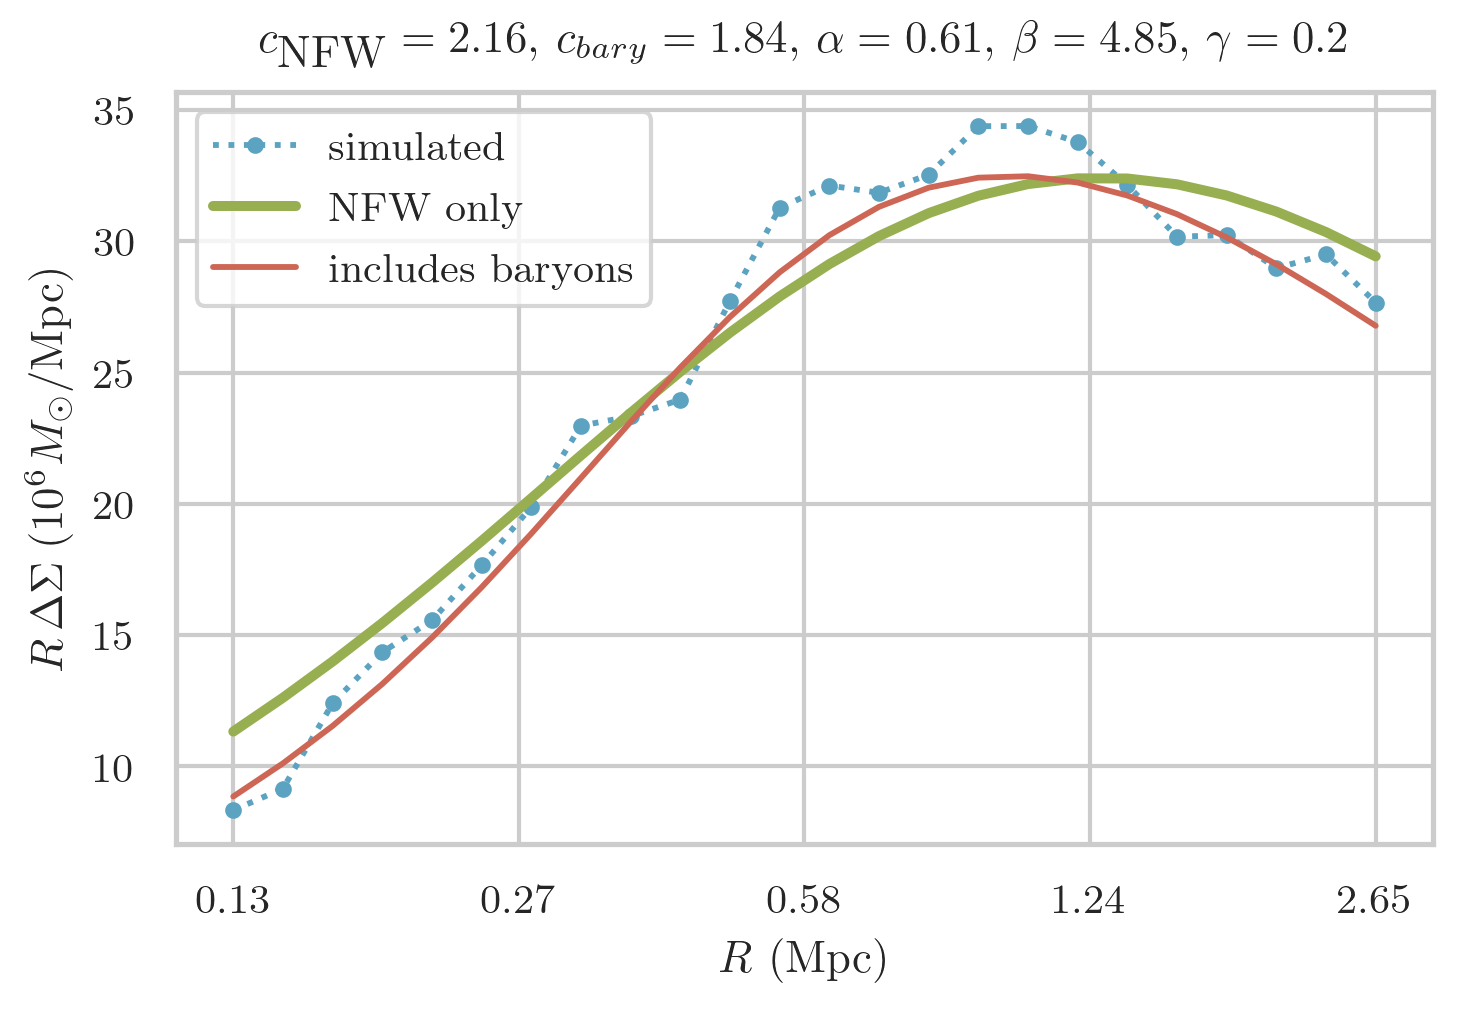

In [21]:
colors = ["#5ca3c2", "#97ae51", "#cd6654"]

plt.plot(rs, rs*true_wl, marker='o', label='simulated', linestyle=':', markersize=3, color=colors[0])
plt.plot(rs, rs*nfw_fit, label='NFW only', color=colors[1], linewidth=2.4)
plt.plot(rs, rs*bary_fit, label='includes baryons', color=colors[2])

plt.legend(loc='best')

plt.xlabel(r'$R$ (Mpc)')
plt.ylabel(r'$R \, \Delta \Sigma\; (10^6 M_\odot/$Mpc)')

plt.xscale('log')

plt.xscale('log')
plt.xticks(np.logspace(np.log10(rs[0]), np.log10(rs[-1]), 5))
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.2f}')) # 2 decimal places

c_n = round(nfw_params[0, 1], 2)
c_b = round(bary_params[0, 1], 2)
a = round(bary_params[0, 2], 2)
b = round(bary_params[0, 3], 2)

plt.title(
    fr'$c_{{\textrm{{NFW}}}}={c_n}, \, c_{{bary}}={c_b}, \, \alpha={a}, \, \beta={b}, \, \gamma=0.2$',
)

fig = plt.gcf()
fig.set_size_inches(5, 3.5)
pass


plt.savefig('../figs/sims/NBatta2010/single-mass-bin_best-fit-example.pdf', bbox_inches='tight')